### Reading data for red and white wine
\[_In case you’re unable to see the Atoti visualizations in GitHub, try viewing the notebook in [nbviewer](https://nbviewer.org/github/atoti/notebooks/blob/main/notebooks/01-use-cases/other-industries/wine-analytics/main.ipynb)._]

In this notebook, we are using the wine quality datasets from https://archive.ics.uci.edu/ml/datasets/Wine+Quality. 

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=wineAnalytics" target="_blank"><img src="https://data.atoti.io/notebooks/banners/Discover+Atoti+now.jpg" alt="Try Atoti"></a></div>

In [1]:
import atoti as tt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
wine_red = pd.read_csv(
    "https://data.atoti.io/notebooks/wine-analytics/winequality-red.csv", sep=";"
)
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_white = pd.read_csv(
    "https://data.atoti.io/notebooks/wine-analytics/winequality-white.csv", sep=";"
)
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Merging dataset for loading into Atoti

We can combine the 2 dataset by adding the category for the wine.

In [4]:
wine_red["category"] = "Red"
wine_white["category"] = "White"

wines = pd.concat([wine_red, wine_white], axis=0, ignore_index=True)
wines.index.set_names("wine index", inplace=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
wine index,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


We group the wines into 3 broad ratings-good, average and poor-based on the quality. 

In [5]:
wines["rating"] = "Good"
wines.loc[wines["quality"] < 7, "rating"] = "Average"
wines.loc[wines["quality"] < 5, "rating"] = "Poor"
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,rating
wine index,,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White,Average
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White,Average
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White,Average


### Wine analysis by correlated features

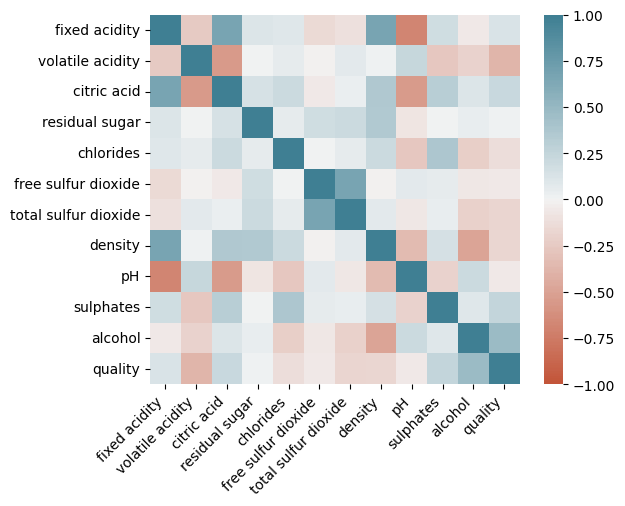

In [10]:
corr_red = wine_red.drop(columns=["category"]).corr()
ax_red = sns.heatmap(
    corr_red,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax_red.set_xticklabels(
    ax_red.get_xticklabels(), rotation=45, horizontalalignment="right"
);

Let's look at the features that are correlated to the quality. 

The correlation value is not very high, so just for demonstrative purpose, we will take the threshold value of 0.25 to select a few key features that are most correlated.  
We will not consider the interaction between the features.

In [11]:
corr_red[(corr_red["quality"] > 0.25) | (corr_red["quality"] < -0.25)]["quality"]

volatile acidity   -0.390558
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

In [13]:
corr_white = wine_white.drop(columns=["category"]).corr()
corr_white[(corr_white["quality"] > 0.25) | (corr_white["quality"] < -0.25)]["quality"]

density   -0.307123
alcohol    0.435575
quality    1.000000
Name: quality, dtype: float64

In [14]:
wine_variables = wines.reset_index()
wine_variables.head()

,wine index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,rating
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,Average
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,Average
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,Average
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,Average
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,Average


In [15]:
wine_variables_melt = pd.melt(
    wine_variables,
    id_vars=["wine index"],
    value_vars=[
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol",
    ],
)

In [16]:
wine_variables_melt.head()

,wine index,variable,value
0,0,fixed acidity,7.4
1,1,fixed acidity,7.8
2,2,fixed acidity,7.8
3,3,fixed acidity,11.2
4,4,fixed acidity,7.4


### Getting started with Atoti

In [17]:
session = tt.Session(user_content_storage="./content")

In [18]:
wines_table = session.read_pandas(
    wine_variables_melt,
    table_name="Wine quality",
    keys=["wine index", "variable"],
    default_values={"value": 0.0},
)

In [19]:
cube = session.create_cube(wines_table, "Wines")

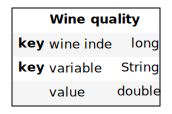

In [20]:
cube.schema

### Joining additional tables to the cube

In [21]:
wines_detail = session.read_pandas(
    wine_variables[["wine index", "category", "rating", "quality"]],
    table_name="Wine detail",
    keys=["wine index"],
)

In [22]:
wines_table.join(wines_detail)

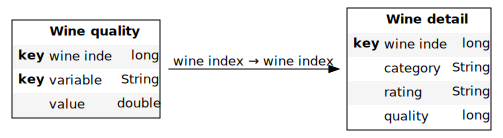

In [23]:
cube.schema

In [24]:
session.visualize("Wine characteristics comparison")

Open the notebook in JupyterLab with the Atoti extension enabled to build this widget.

### Creating hierarchy from numerical columns

In [25]:
h, m = cube.hierarchies, cube.measures

In [26]:
h["value"] = [wines_table["value"]]

In [27]:
h

{('Wine quality', 'wine index'): <atoti.hierarchy.Hierarchy object at 0x000002AF29D91090>, ('Wine detail', 'rating'): <atoti.hierarchy.Hierarchy object at 0x000002AF29D933A0>, ('Wine quality', 'value'): <atoti.hierarchy.Hierarchy object at 0x000002AF29D93490>, ('Wine detail', 'category'): <atoti.hierarchy.Hierarchy object at 0x000002AF29D93520>, ('Wine quality', 'variable'): <atoti.hierarchy.Hierarchy object at 0x000002AF29D935E0>}

### Creating simple measure from referenced table

In [28]:
m["quality"] = tt.agg.mean(wines_detail["quality"])

In [29]:
session.visualize("Features vs Wine quality")

Open the notebook in JupyterLab with the Atoti extension enabled to build this widget.

In [30]:
session.link(path="/#/dashboard/29f")

Open the notebook in JupyterLab with the Atoti extension enabled to see this link.

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=wineAnalytics" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Try+Atoti.jpg" alt="Try Atoti"></a></div>